## HW3_Sounds and signals
#### 휴먼지능정보공학과
#### Name : 김영서
#### Student number : 201910787

In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

### Exercise 1.2

Go to http://freesound.org and download a sound sample that
includes music, speech, or other sounds that have a well-defined pitch.
Select a roughly half-second segment where the pitch is
constant.  Compute and plot the spectrum of the segment you selected.
What connection can you make between the timbre of the sound and the
harmonic structure you see in the spectrum?

Use `high_pass`, `low_pass`, and `band_stop` to
filter out some of the harmonics.  Then convert the spectrum back
to a wave and listen to it.  How does the sound relate to the
changes you made in the spectrum?

### Solution

사용한 sound sample : https://freesound.org/s/120994/

In [2]:
from thinkdsp import read_wave

wave = read_wave('173261__toam__bass-wirrwarr01-120bpm.wav')
wave.normalize()
wave.make_audio()

전체적인 wave는 다음과 같다.

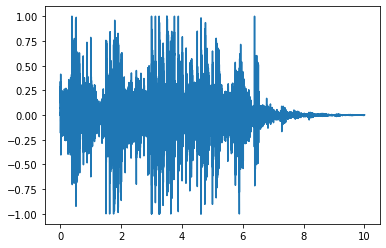

In [3]:
wave.plot()

일정한 segment 선택 (duartion = 0.1)

In [4]:
segment = wave.segment(start=1.0, duration=0.1)
segment.make_audio()

선택한 segment는 다음과 같다.

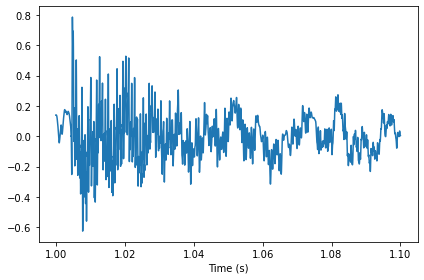

In [5]:
from thinkdsp import decorate

segment.plot()
decorate(xlabel='Time (s)')

그리고, 더 짧은 segment를 선택한 것은 다음과 같다. (duration = 0.005)

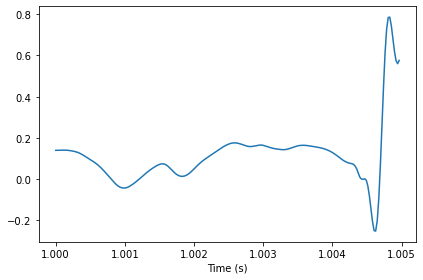

In [6]:
segment.segment(start=1.0, duration=0.005).plot()
decorate(xlabel='Time (s)')

spectrum은 다음과 같다.

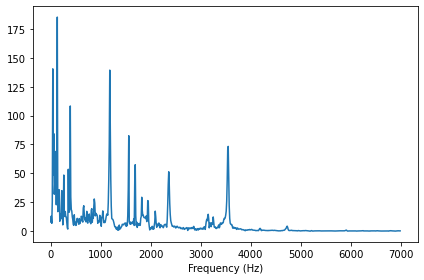

In [7]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)
decorate(xlabel='Frequency (Hz)')

fundamental frequency와 dominant frequency를 찾기 위해 zoom해보면 다음과 같다.

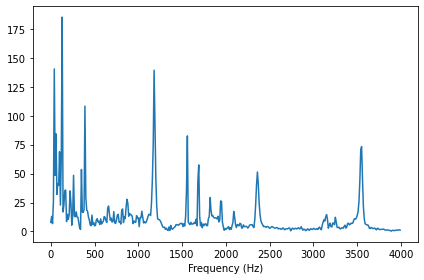

In [8]:
spectrum = segment.make_spectrum()
spectrum.plot(high=4000)
decorate(xlabel='Frequency (Hz)')

`peak`를 이용하여 spectrum의 가장 높은 지점과 해당 주파수를 내림차순으로 출력

In [9]:
spectrum.peaks()[:30]

[(185.3045974234953, 130.0),
 (140.4999627409096, 40.0),
 (139.38507248940846, 1180.0),
 (108.33879255421962, 390.0),
 (94.00838823990674, 1190.0),
 (84.36702387049826, 60.0),
 (82.59274551759768, 1560.0),
 (75.1910052221448, 1170.0),
 (73.34485460605816, 3550.0),
 (70.43811828924818, 3540.0),
 (68.95888724700588, 100.0),
 (65.75880200481586, 120.0),
 (57.51307310638495, 1690.0),
 (53.54328206027693, 350.0),
 (51.361311142522304, 2360.0),
 (48.54423425404455, 260.0),
 (48.4576912612223, 50.0),
 (45.855275595660075, 3560.0),
 (45.35452680087117, 1200.0),
 (44.47681552849768, 1160.0),
 (44.1897302240155, 3530.0),
 (44.07731500896997, 1680.0),
 (41.398678529662156, 80.0),
 (40.85951959073051, 2370.0),
 (40.39163317235314, 2350.0),
 (39.95247063576349, 90.0),
 (35.82250443200135, 1550.0),
 (35.82029411831678, 170.0),
 (35.3346273876083, 160.0),
 (35.077957539601485, 220.0)]

- Dominant frequency는 **130 Hz**
- Fundamental frequency는 대략 **40 Hz**
- Harmonics는 **40, 80, 120 Hz**

40 Hz는 41.20 Hz의 E1과 비슷하다. `peak`를 통해 소리의 추출된 pitch는 Dominant frequency가 아닌 Fundamental frequency에 의해 결정된다.
    
다음으로 `low_pass`를 사용해 frequency를 filter out 해보면 다음과 같다.

In [10]:
spectrum.low_pass(2000)

소리는 다음과 같다.

In [11]:
spectrum.make_wave().make_audio()

`high_pass`를 사용한 frequency filter out

In [12]:
spectrum.high_pass(2000)

소리는 다음과 같다.

In [13]:
spectrum.make_wave().make_audio()

`band_stop`을 사용한 frequency filter out (factor = 0.01)

In [14]:
spectrum.band_stop(2000,0.01)

소리는 다음과 같다.

In [15]:
spectrum.make_wave().make_audio()

다음 코드를 통해 어떠한 세그먼트를 선택하고 다른 필터를 적용할 수 있다.

In [16]:
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [17]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…